/root/miniconda3/envs/umap/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 5.58M/5.58M [00:02<00:00, 2.78MB/s]
/root/miniconda3/envs/umap/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/root/miniconda3/envs/umap/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/root/miniconda3/envs/umap/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


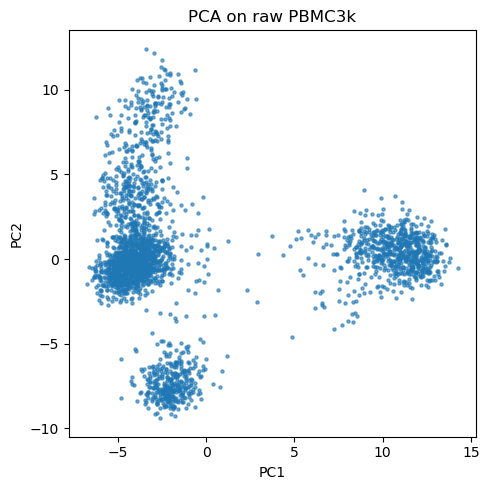

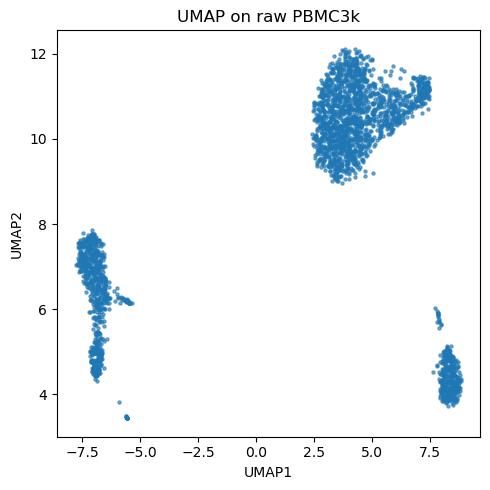

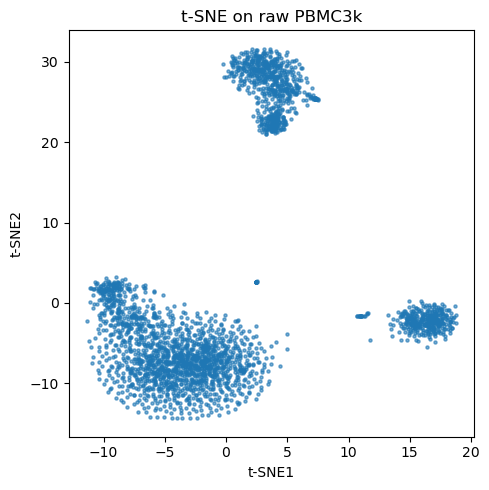

In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# 1) PBMC3k raw 데이터 불러오기
adata = sc.datasets.pbmc3k()
adata.var_names_make_unique()

# 2) 기본 전처리
sc.pp.normalize_total(adata, target_sum=1e4)  # 라이브러리 크기 정규화
sc.pp.log1p(adata)                            # 로그 변환
sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset=True)

# 데이터를 numpy array 로 추출
X = adata.X.toarray()  # (n_cells, n_hvg)

# 3) PCA
pca = PCA(n_components=2, random_state=0)
pca_coords = pca.fit_transform(X)
plt.figure(figsize=(5,5))
plt.scatter(pca_coords[:,0], pca_coords[:,1], s=5, alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA on raw PBMC3k')
plt.tight_layout()

# 4) UMAP
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=0)
umap_coords = umap_reducer.fit_transform(X)
plt.figure(figsize=(5,5))
plt.scatter(umap_coords[:,0], umap_coords[:,1], s=5, alpha=0.6)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('UMAP on raw PBMC3k')
plt.tight_layout()

# 5) t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
tsne_coords = tsne.fit_transform(X)
plt.figure(figsize=(5,5))
plt.scatter(tsne_coords[:,0], tsne_coords[:,1], s=5, alpha=0.6)
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('t-SNE on raw PBMC3k')
plt.tight_layout()

plt.show()

/root/miniconda3/envs/umap/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


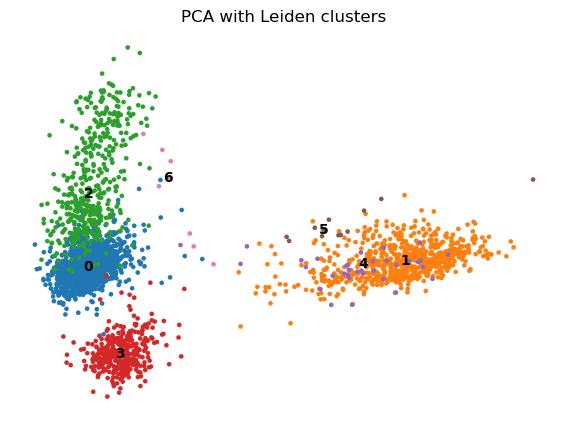

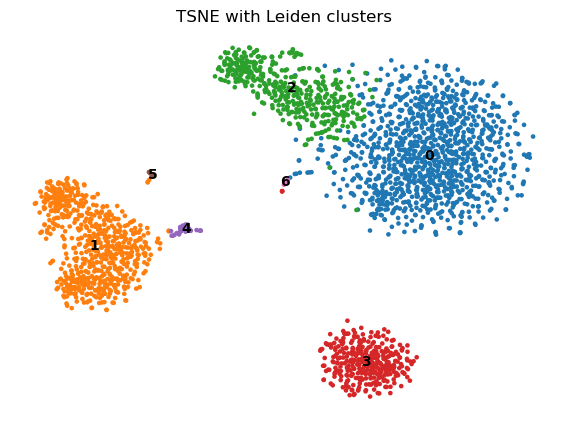

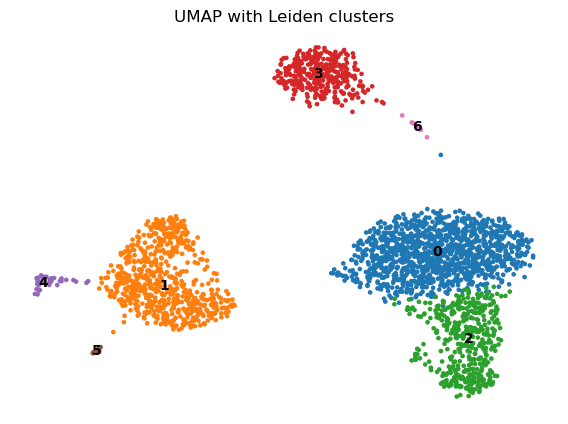

In [3]:
import scanpy as sc
import matplotlib.pyplot as plt

# 1. 데이터 로드
adata = sc.datasets.pbmc3k()  # PBMC3K 예제 데이터

# 2. 기본 전처리
sc.pp.filter_cells(adata, min_genes=200)      # 200개 미만 유전자 제거
sc.pp.filter_genes(adata, min_cells=3)        # 3개 미만 세포에서 발현되는 유전자 제거
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # 미토콘드리아 유전자 마크
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

# 3. 정규화 및 로그 변환
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# 4. 고변이 유전자 선택
sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset=True, flavor='seurat')

# 5. 스케일링 & 회귀 (선택 사항)
sc.pp.scale(adata, max_value=10)

# 6. 차원 축소 및 이웃 그래프 계산
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

# 7. 클러스터링 (Louvain or Leiden)
# sc.tl.louvain(adata, resolution=0.5)  # 클러스터 수 조정 시 resolution 값 변경
sc.tl.leiden(adata, resolution=0.5)

# 8. t-SNE, UMAP 계산
sc.tl.tsne(adata, n_pcs=40)
sc.tl.umap(adata)

# 9. 시각화: 각 차원 축소 결과에 클러스터 라벨 표시
#    'on data' 옵션으로 데이터 포인트 위에 라벨 표시
# for method in ['pca', 'tsne', 'umap']:
#     sc.pl.scatter(
#         adata,
#         basis=method,
#         color='louvain',
#         title=f"{method.upper()} with Louvain clusters",
#         legend_loc='on data',
#         frameon=False,
#         show=True

for method in ['pca', 'tsne', 'umap']:
    sc.pl.scatter(
        adata,
        basis=method,
        color='leiden',
        title=f"{method.upper()} with Leiden clusters",
        legend_loc='on data',
        frameon=False,
        show=True

)

In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터 로드 & 전처리 (이전과 동일)
adata = sc.datasets.pbmc3k()
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], inplace=True)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset=True, flavor='seurat')
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
# sc.tl.louvain(adata, resolution=0.5)
sc.tl.leiden(adata, resolution=0.5)

sc.tl.tsne(adata, n_pcs=40)
sc.tl.umap(adata)

# 2. Embedding 사전 정의
embeddings = {
    'PCA': adata.obsm['X_pca'][:, :2],
    't-SNE': adata.obsm['X_tsne'],
    'UMAP': adata.obsm['X_umap']
}

# 3. 클러스터별 색상 & 순서
clusters = adata.obs['louvain'].cat.categories
colors   = plt.cm.tab10(np.linspace(0, 1, len(clusters)))  # 10개 이하 클러스터에 적합

# 4. 플롯 & 외부 legend
for name, coords in embeddings.items():
    fig, ax = plt.subplots(figsize=(6,6))
    # 각 클러스터를 scatter + 레이블 지정
    for i, cl in enumerate(clusters):
        mask = (adata.obs['louvain'] == cl).values
        ax.scatter(
            coords[mask, 0],
            coords[mask, 1],
            s=10,
            color=colors[i],
            label=f" {cl}",
            alpha=0.8
        )
    # 범례를 플롯 바깥에 배치
    ax.legend(
        title='Cell Type',
        bbox_to_anchor=(1.02, 1),
        loc='upper left',
        borderaxespad=0
    )
    # 레이아웃 조정
    fig.subplots_adjust(right=0.75)
    ax.set_title(f"{name} embedding with Louvain clusters")
    ax.set_xlabel(f"{name} 1")
    ax.set_ylabel(f"{name} 2")
    ax.set_xticks([])
    ax.set_yticks([])
    plt.tight_layout()
    plt.show()

/root/miniconda3/envs/umap/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_88962/907913191.py:18: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)
/root/miniconda3/envs/umap/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


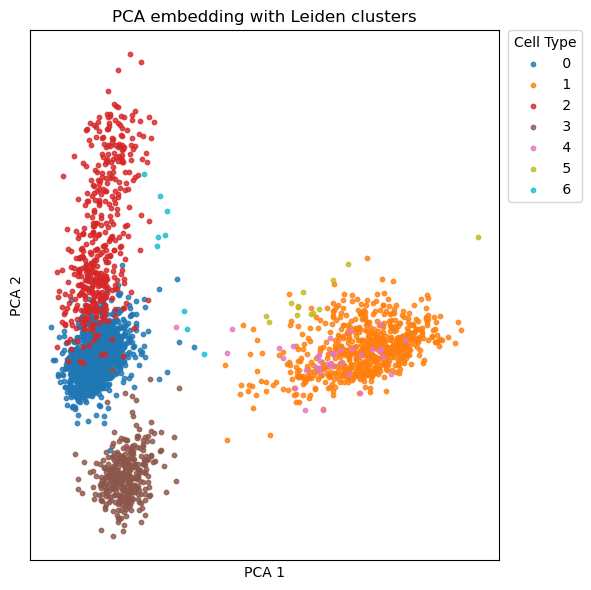

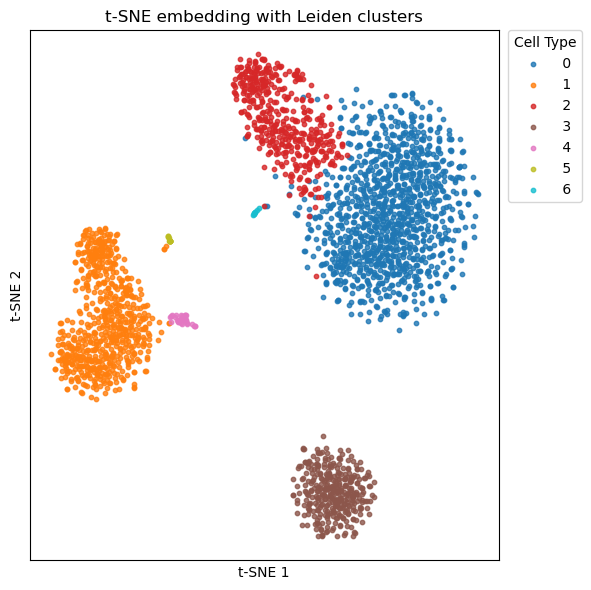

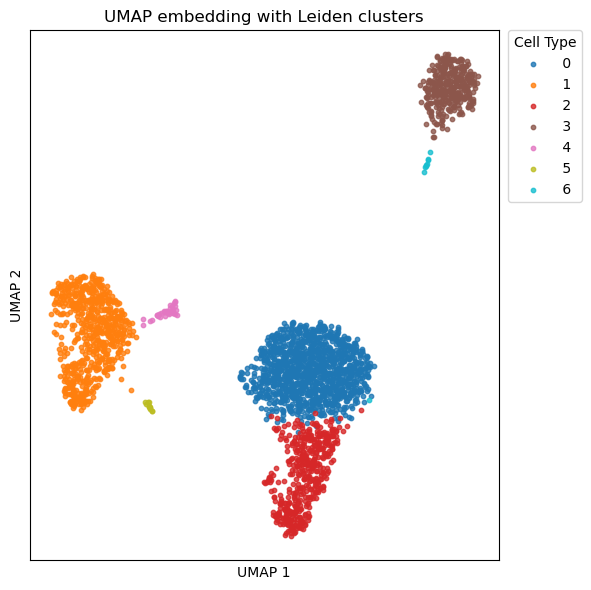

In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터 로드 & 전처리 (이전과 동일)
adata = sc.datasets.pbmc3k()
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], inplace=True)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset=True, flavor='seurat')
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
# sc.tl.louvain(adata, resolution=0.5)
sc.tl.leiden(adata, resolution=0.5)

sc.tl.tsne(adata, n_pcs=40)
sc.tl.umap(adata)

# 2. Embedding 사전 정의
embeddings = {
    'PCA': adata.obsm['X_pca'][:, :2],
    't-SNE': adata.obsm['X_tsne'],
    'UMAP': adata.obsm['X_umap']
}

# 3. 클러스터별 색상 & 순서
clusters = adata.obs['leiden'].cat.categories  # louvain에서 leiden으로 변경
colors   = plt.cm.tab10(np.linspace(0, 1, len(clusters)))  # 10개 이하 클러스터에 적합

# 4. 플롯 & 외부 legend
for name, coords in embeddings.items():
    fig, ax = plt.subplots(figsize=(6,6))
    # 각 클러스터를 scatter + 레이블 지정
    for i, cl in enumerate(clusters):
        mask = (adata.obs['leiden'] == cl).values  # louvain에서 leiden으로 변경
        ax.scatter(
            coords[mask, 0],
            coords[mask, 1],
            s=10,
            color=colors[i],
            label=f" {cl}",
            alpha=0.8
        )
    # 범례를 플롯 바깥에 배치
    ax.legend(
        title='Cell Type',
        bbox_to_anchor=(1.02, 1),
        loc='upper left',
        borderaxespad=0
    )
    # 레이아웃 조정
    fig.subplots_adjust(right=0.75)
    ax.set_title(f"{name} embedding with Leiden clusters")  # Louvain에서 Leiden으로 변경
    ax.set_xlabel(f"{name} 1")
    ax.set_ylabel(f"{name} 2")
    ax.set_xticks([])
    ax.set_yticks([])
    plt.tight_layout()
    plt.show()

In [ ]:
import numpy as np
from sklearn.neighbors import kneighbors_graph
from scipy.sparse import csgraph, csr_matrix
from scipy.sparse.linalg import eigsh

def compute_spectrum(coords, k=10, r=20):
    """
    coords: (n_cells, d) embedding or native PCA coords
    k: # of neighbors
    r: # of nontrivial eigenvalues to keep
    returns: array of length (r+1) sorted eigenvalues [λ0=0, λ1, …, λr]
    """
    # 1) k-NN 거리 그래프 (sparse)
    D = kneighbors_graph(coords, n_neighbors=k,
                         mode='distance', include_self=False)
    # 2) 대칭화
    D = 0.5 * (D + D.T)
    # 3) 가우시안 가중치로 변환
    sigma = np.median(D.data)
    W_data = np.exp(- (D.data**2) / (2 * sigma**2 + 1e-16))
    W = csr_matrix((W_data, D.indices, D.indptr), shape=D.shape)
    W = 0.5 * (W + W.T)  # ensure symmetry

    # 4) 정규화된 라플라시안
    L = csgraph.laplacian(W, normed=True)

    # 5) 작은 고윳값 r+1개 계산
    m = min(r+1, L.shape[0]-2)  # 안전하게 n-2 이하로
    vals, _ = eigsh(L, k=m, which='SM', tol=1e-3)
    vals = np.sort(vals)

    # 6) 길이 맞추기
    if vals.shape[0] < r+1:
        vals = np.concatenate([vals, np.zeros(r+1 - vals.shape[0])])
    return vals

def spectral_graph_concordance(vals_nat, vals_lat, r=20):
    """
    vals_nat, vals_lat: length-(r+1) arrays of eigenvalues
    returns SGC clipped to [0,1]
    """
    diff = np.abs(vals_nat[1:r+1] - vals_lat[1:r+1]).sum()
    denom = vals_nat[1:r+1].sum()
    if denom <= 0:
        return 0.0
    sgc = 1.0 - diff / denom
    return float(np.clip(sgc, 0.0, 1.0))

# ----------------
# 1) Native spectrum (한 번만)
k, r = 10, 20
native_coords = adata.obsm['X_pca'][:, :40]  # PCA 공간 사용
vals_nat = compute_spectrum(native_coords, k=k, r=r)

# 2) 각 embedding에 대해 SGC 계산
print(f"Spectral Graph Concordance (r={r}, k={k}):")
for name, coords in embeddings.items():
    vals_lat = compute_spectrum(coords, k=k, r=r)
    sgc = spectral_graph_concordance(vals_nat, vals_lat, r=r)
    print(f"  {name:6s} → SGC = {sgc:.3f}")


In [1]:
import cupy as cp
from sklearn.neighbors import NearestNeighbors

def evaluate_embedding_gpu(
    X_hi_cp, Z_low_cp,
    k=30,
    n_pairs=100_000,
    random_state=0
):
    """
    - GPU 상에서 거리 샘플링, Pearson corr, 1D EMD 계산
    - KNN overlap 은 sklearn NearestNeighbors 로 CPU 상에서 계산
    """
    N = X_hi_cp.shape[0]
    rs = cp.random.RandomState(random_state)
    idx = rs.randint(0, N, size=(n_pairs, 2))

    # 1) 샘플링된 거리 계산 (GPU)
    Dx = cp.linalg.norm(
        X_hi_cp[idx[:, 0]] - X_hi_cp[idx[:, 1]], axis=1
    ).astype(cp.float32)
    Dz = cp.linalg.norm(
        Z_low_cp[idx[:, 0]] - Z_low_cp[idx[:, 1]], axis=1
    ).astype(cp.float32)

    # 2) GPU 위에서 Pearson correlation 계산
    x_mean = Dx.mean()
    z_mean = Dz.mean()
    cov    = ((Dx - x_mean) * (Dz - z_mean)).mean()
    std_x  = (Dx - x_mean).std()
    std_z  = (Dz - z_mean).std()
    corr   = cov / (std_x * std_z + 1e-8)

    # 3) 1D EMD via 정렬 (GPU)
    Dx_s = cp.sort(Dx)
    Dz_s = cp.sort(Dz)
    emd  = cp.mean(cp.abs(Dx_s - Dz_s))

    # 4) KNN-overlap (CPU, sklearn)
    X_np = cp.asnumpy(X_hi_cp)
    Z_np = cp.asnumpy(Z_low_cp)

    nn_hi = NearestNeighbors(n_neighbors=k+1).fit(X_np)
    nn_lo = NearestNeighbors(n_neighbors=k+1).fit(Z_np)

    knn_hi = nn_hi.kneighbors(X_np, return_distance=False)[:, 1:]
    knn_lo = nn_lo.kneighbors(Z_np, return_distance=False)[:, 1:]

    overlap = (knn_hi[:, :, None] == knn_lo[:, None, :]).any(-1).mean()

    return {
        'corr':     float(corr),
        'emd':      float(emd),
        'knn_pres': float(overlap)
    }

In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
import pandas as pd
from sklearn.neighbors import NearestNeighbors

# 1. 데이터 로드 & 전처리 (이전과 동일)
adata = sc.datasets.pbmc3k()
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], inplace=True)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset=True, flavor='seurat')
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.leiden(adata, resolution=0.5)
sc.tl.tsne(adata, n_pcs=40)
sc.tl.umap(adata)

# 2. 원본 고차원 데이터와 임베딩 데이터 준비
# adata.X가 이미 numpy 배열인 경우 바로 사용
if hasattr(adata.X, 'toarray'):
    X_high = adata.X.toarray()  # sparse matrix인 경우
else:
    X_high = adata.X  # 이미 numpy array인 경우
X_high_cp = cp.asarray(X_high)  # GPU로 데이터 이동

# 임베딩 데이터 준비
embeddings = {
    'PCA': adata.obsm['X_pca'][:, :2],
    't-SNE': adata.obsm['X_tsne'],
    'UMAP': adata.obsm['X_umap']
}

# 3. 각 임베딩 방법 평가
results = {}
for name, coords in embeddings.items():
    # 임베딩 데이터를 GPU로 이동
    Z_low_cp = cp.asarray(coords)
    
    # 임베딩 평가
    metrics = evaluate_embedding_gpu(
        X_high_cp, Z_low_cp,
        k=15,  # 15-최근접 이웃 사용
        n_pairs=50_000,  # 계산 속도를 위해 50,000 쌍 사용
        random_state=42
    )
    
    results[name] = metrics

# 4. 결과를 데이터프레임으로 변환하여 표시
results_df = pd.DataFrame(results).T
results_df.columns = ['Correlation', 'EMD', 'KNN Preservation']
print("임베딩 평가 결과:")
print(results_df)

# 5. 결과 시각화
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
metrics = ['Correlation', 'EMD', 'KNN Preservation']

for i, metric in enumerate(metrics):
    ax = axes[i]
    results_df[metric].plot(kind='bar', ax=ax)
    ax.set_title(f'{metric} 비교')
    ax.set_ylabel(metric)
    ax.set_ylim([0 if metric != 'EMD' else None, 1 if metric != 'EMD' else None])

plt.tight_layout()
plt.show()

In [ ]:
# Silhouette Score 계산
from sklearn.metrics import silhouette_score

print("\nSilhouette Score 계산:")
silhouette_scores = {}

# 각 임베딩 방법에 대해 Silhouette Score 계산
for name, coords in embeddings.items():
    # 클러스터 레이블 가져오기 (leiden 클러스터링 결과 사용)
    if 'leiden' in adata.obs.columns:
        labels = adata.obs['leiden'].astype(int).values
        # Silhouette Score 계산
        s_score = silhouette_score(coords, labels)
        silhouette_scores[name] = s_score
    else:
        print(f"클러스터 레이블이 없어 {name}의 Silhouette Score를 계산할 수 없습니다.")

# 결과 출력
if silhouette_scores:
    silhouette_df = pd.DataFrame(silhouette_scores, index=['Silhouette Score']).T
    print(silhouette_df)
    
    # Silhouette Score 시각화
    plt.figure(figsize=(8, 5))
    silhouette_df.plot(kind='bar')
    plt.title('임베딩 방법별 Silhouette Score')
    plt.ylabel('Silhouette Score')
    plt.ylim([0, 1])  # Silhouette Score는 -1에서 1 사이지만, 일반적으로 양수 값을 기대
    plt.tight_layout()
    plt.show()
